In [1]:
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow import keras


In [2]:
## 경로 지정
print('현재 경로 : ',os.getcwd())

lilly_path = './flower_images/Lilly/'
lotus_path = './flower_images/Lotus/'
orchid_path = './flower_images/Orchid/'
sunflower_path = './flower_images/Sunflower/'
tulip_path = './flower_images/Tulip/'

현재 경로 :  c:\Users\T\Desktop\Temp


In [3]:
# 이미지 data를 변수에 저장
def tran_img(path):
  imgs = []
  for fn in os.listdir(path):    # os.listdir(path) : path 경로 안에 파일 명들을 list 요소로 반환.
    img = cv2.imread(os.path.join(path, fn))
    if img is not None:
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      img = cv2.resize(img, (160, 160))  # Resize to a fixed size for the model
      imgs.append(img)
  return imgs

lilly_images = tran_img(lilly_path)
lotus_images = tran_img(lotus_path)
orchid_images = tran_img(orchid_path)
sunflower_images = tran_img(sunflower_path)
tulip_images = tran_img(tulip_path)


1000
<class 'list'>
[array([[[59, 52, 44],
        [59, 52, 44],
        [60, 53, 45],
        ...,
        [66, 60, 52],
        [60, 55, 51],
        [55, 51, 48]],

       [[59, 52, 44],
        [60, 53, 45],
        [61, 54, 46],
        ...,
        [65, 59, 51],
        [61, 56, 52],
        [55, 51, 48]],

       [[60, 53, 45],
        [60, 53, 45],
        [61, 54, 46],
        ...,
        [64, 57, 50],
        [58, 53, 49],
        [53, 49, 46]],

       ...,

       [[60, 60, 50],
        [62, 58, 49],
        [62, 54, 47],
        ...,
        [47, 46, 42],
        [37, 37, 37],
        [37, 37, 37]],

       [[58, 58, 48],
        [58, 54, 45],
        [59, 51, 43],
        ...,
        [52, 51, 47],
        [38, 38, 38],
        [38, 38, 38]],

       [[56, 56, 46],
        [56, 52, 43],
        [58, 50, 43],
        ...,
        [57, 56, 52],
        [39, 39, 39],
        [39, 39, 39]]], dtype=uint8), array([[[ 83,  97,  36],
        [ 90, 104,  43],
        [ 95, 111,  

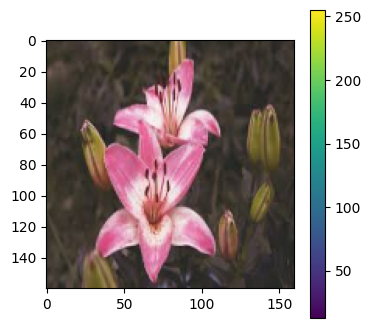

In [4]:
print(len(lilly_images))
print(type(lilly_images))
print(lilly_images)


## 이미지 확인
print(os.listdir(lilly_path))

plt.figure(figsize = (4,4))
plt.imshow(lilly_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


In [5]:
## 정답 label 생성
labels_dict = {0:'Lilly', 1:'Lotus', 2:'Orchid', 3:'Sunflower', 4:'Tulip'}

lilly_labels = ([0] * len(lilly_images))
lotus_labels = ([1] * len(lotus_images))
orchid_labels = ([2] * len(orchid_images))
sunflower_labels = ([3] * len(sunflower_images))
tulip_labels = ([4] * len(tulip_images))

print(orchid_labels)
print(len(orchid_labels))

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [6]:
# data에서 테스트 data 분리
def split_data(train, label):
    train_input, test_input, train_label, test_label =\
    train_test_split(train, label, test_size=0.1, random_state=42)

    return train_input, test_input, train_label, test_label

lilly_split = split_data(lilly_images, lilly_labels)
lilly_train_input = lilly_split[0]
lilly_test_input = lilly_split[1]
lilly_train_label = lilly_split[2]
lilly_test_label = lilly_split[3]

lotus_split = split_data(lotus_images, lotus_labels)
lotus_train_input = lotus_split[0]
lotus_test_input = lotus_split[1]
lotus_train_label = lotus_split[2]
lotus_test_label = lotus_split[3]

orchid_split = split_data(orchid_images, orchid_labels)
orchid_train_input = orchid_split[0]
orchid_test_input = orchid_split[1]
orchid_train_label = orchid_split[2]
orchid_test_label = orchid_split[3]

sunflower_split = split_data(sunflower_images, sunflower_labels)
sunflower_train_input = sunflower_split[0]
sunflower_test_input = sunflower_split[1]
sunflower_train_label = sunflower_split[2]
sunflower_test_label = sunflower_split[3]

tulip_split = split_data(tulip_images, tulip_labels)
tulip_train_input = tulip_split[0]
tulip_test_input = tulip_split[1]
tulip_train_label = tulip_split[2]
tulip_test_label = tulip_split[3]

# data 분리 확인
print(len(lilly_train_input))
print(len(lilly_train_label))
print(lilly_train_label)
print(len(lilly_test_input))
print(len(lilly_test_label))

900
900
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [7]:
# np 배열 만들기
train_input = np.array(lilly_train_input + lotus_train_input + orchid_train_input + sunflower_train_input + tulip_train_input)
train_label = np.array(lilly_train_label + lotus_train_label + orchid_train_label + sunflower_train_label + tulip_train_label)
test_input = np.array(lilly_test_input + lotus_test_input + orchid_test_input + sunflower_test_input + tulip_test_input)
test_label = np.array(lilly_test_label + lotus_test_label + orchid_test_label + sunflower_test_label + tulip_test_label)

# 배열 확인_split 할 때 10% test로 하였고 모두 합했으니 train_input, train_label = 900*5, test_input, test_label = 100*5 일 것이다.
print(len(train_input), len(train_label), len(test_input), len(test_label))
print(train_label)

4500 4500 500 500
[0 0 0 ... 4 4 4]


In [8]:
# data 정규화
train_scaled = train_input / 255.0
test_scaled = test_input / 255.0

# data 크기 확인
print(train_scaled.shape)
print(test_scaled.shape)

(4500, 160, 160, 3)
(500, 160, 160, 3)


In [ ]:
'''
# ModelCheckpoint 콜백으로 저장한 신경망 모델 가져와서 평가
# 저장된 모델 가져오면 신경망 모델 구성이나 설정, 훈련 필요 없음. 바로 평가 or 예측. 
model = keras.models.load_model('F:/KimTH/00.Study/Study_Book/best-model_p408_epochs=20.h5')
model.evaluate(test_scaled, test_label)
'''

In [9]:
# 신경망 모델 구성
model = keras.Sequential()

model.add(keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same', input_shape=(160, 160, 3)))
model.add(keras.layers.MaxPooling2D(2)) # 폴링 후 특성 맵 크기(80, 80, 32)

model.add(keras.layers.Flatten())   # 밀집층에 입력시키기 위해 3차원을 1차원으로 변환.
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))    # 은닉층의 과대적합을 막기 위해 노드로 들어오는 입력을 랜덤으로 막음.
#model.add(keras.layers.Dense(50, activation='relu'))
#model.add(keras.layers.Dropout(0.4))    
model.add(keras.layers.Dense(5, activation='softmax'))

# 신경망 모델 구조
model.summary()
 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 160, 160, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 80, 80, 128)       0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 819200)            0         
                                                                 
 dense (Dense)               (None, 100)               81920100  
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 505       
                                                        

In [10]:
# 신경망 모델 설정
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('T2_N05_size160_conv1-128_den1-100_epo15_val15.h5', save_best_only=True)

#early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

In [11]:
# 신경망 모델 훈련
history = model.fit(train_scaled, train_label, epochs=15,\
                    validation_split=0.15, verbose=1, callbacks=[checkpoint_cb])


Epoch 1/15
120/120 [==============================] - ETA: 0s - loss: 4.2765 - accuracy: 0.5124

C:\Users\T\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


120/120 [==============================] - 722s 6s/step - loss: 4.2765 - accuracy: 0.5124 - val_loss: 2.3715 - val_accuracy: 0.1333
Epoch 2/15
120/120 [==============================] - 703s 6s/step - loss: 0.8333 - accuracy: 0.6897 - val_loss: 2.3108 - val_accuracy: 0.2015
Epoch 3/15
120/120 [==============================] - 718s 6s/step - loss: 0.5251 - accuracy: 0.8170 - val_loss: 1.9981 - val_accuracy: 0.3615
Epoch 4/15
120/120 [==============================] - 695s 6s/step - loss: 0.2959 - accuracy: 0.9043 - val_loss: 2.5629 - val_accuracy: 0.3526
Epoch 5/15
120/120 [==============================] - 683s 6s/step - loss: 0.2062 - accuracy: 0.9359 - val_loss: 2.2096 - val_accuracy: 0.4178
Epoch 6/15
120/120 [==============================] - 700s 6s/step - loss: 0.1561 - accuracy: 0.9542 - val_loss: 2.6744 - val_accuracy: 0.4178
Epoch 7/15
120/120 [==============================] - 683s 6s/step - loss: 0.1324 - accuracy: 0.9603 - val_loss: 2.7727 - val_accuracy: 0.4222
Epoch 8/15

In [12]:
# history의 key값 알아보기
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


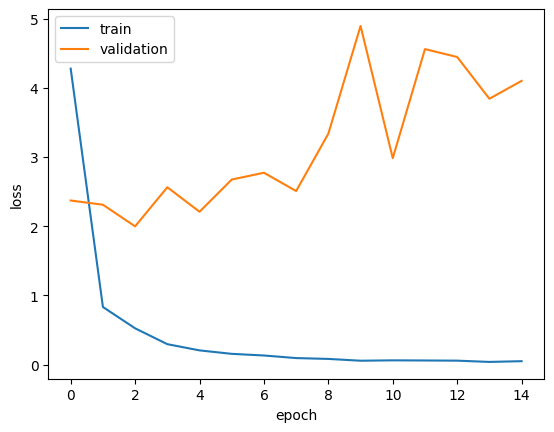

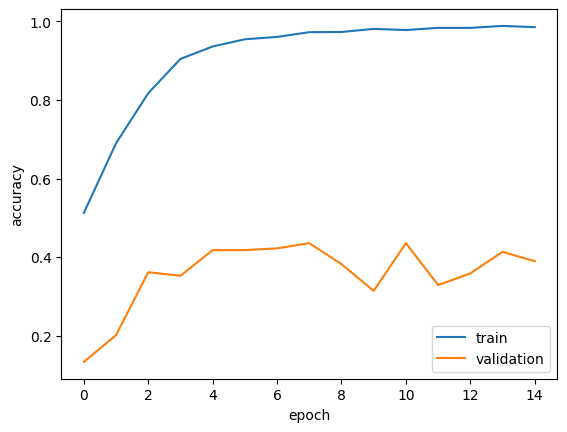

In [13]:
# 훈련 과정 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'])
plt.show()

In [14]:
# test 평가
model.evaluate(test_scaled, test_label)


16/16 [==============================] - 12s 698ms/step - loss: 1.3542 - accuracy: 0.7760


[1.3542195558547974, 0.7760000228881836]

1/1 [==============================] - 1s 1s/step
[[2.0997068e-02 2.1333487e-01 1.9756404e-01 5.6809545e-01 8.6012196e-06]
 [9.9811435e-01 8.1653963e-04 8.8309956e-04 1.8199605e-04 4.0192981e-06]
 [9.9978834e-01 6.5938552e-09 2.1168262e-04 2.5247282e-09 8.6992094e-09]
 [6.0414362e-01 3.5686073e-01 3.8956832e-02 3.8159040e-05 6.5928123e-07]
 [9.9766541e-01 5.3297944e-04 1.7832140e-03 4.4699932e-06 1.3921843e-05]
 [9.9981707e-01 1.1156797e-04 7.0649454e-05 5.0986478e-07 2.0207807e-07]
 [1.0000000e+00 8.7537885e-12 2.1102187e-08 4.4136591e-13 1.4536315e-16]
 [9.9999595e-01 3.4739925e-10 3.0743843e-06 9.5027588e-07 2.8324142e-12]
 [9.3954003e-01 2.6363824e-02 1.1422495e-02 5.8448571e-03 1.6828751e-02]
 [4.1261926e-01 4.8585936e-02 1.7845213e-01 1.6428767e-02 3.4391391e-01]
 [8.0332899e-04 9.9827576e-01 7.4579677e-04 3.8064059e-06 1.7135020e-04]
 [6.0968460e-03 9.9353266e-01 3.6261280e-04 1.1780090e-07 7.6805109e-06]
 [3.6576497e-05 9.9991870e-01 4.3670087e-05 3.6458278e-08 1.0439367e-06]
 

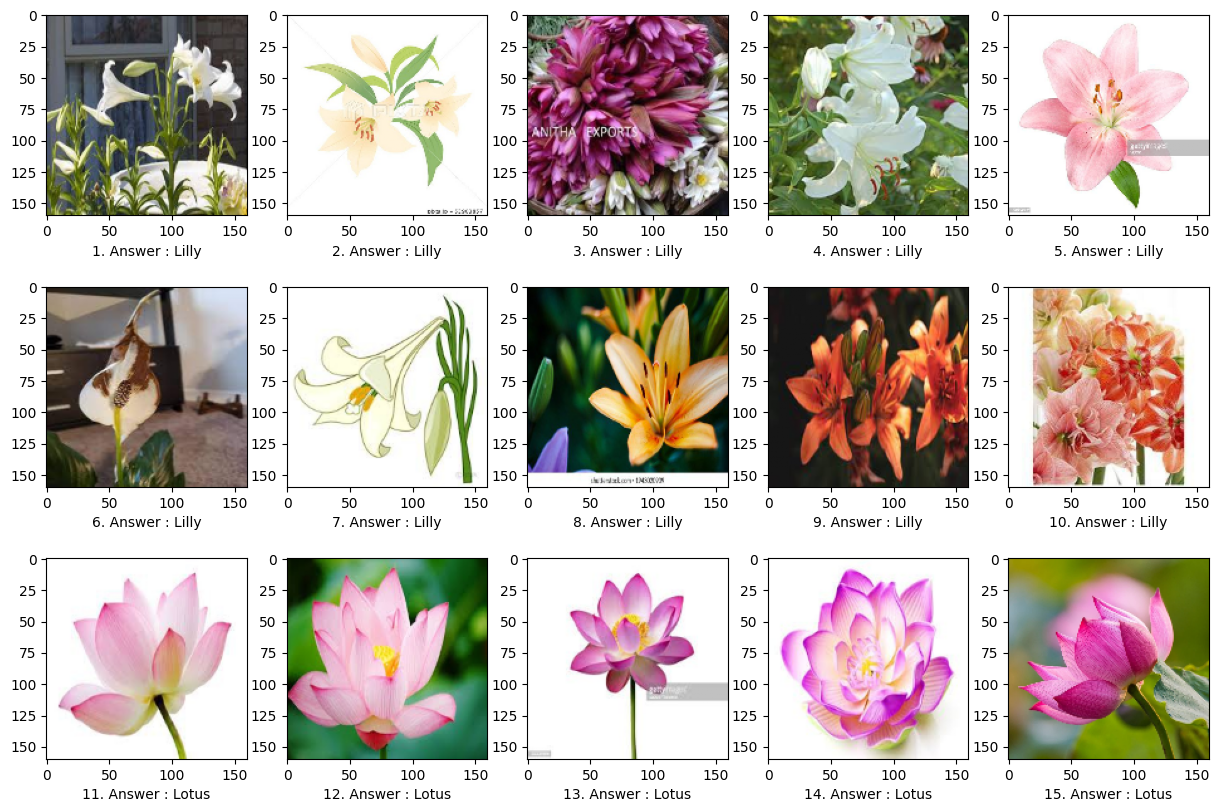

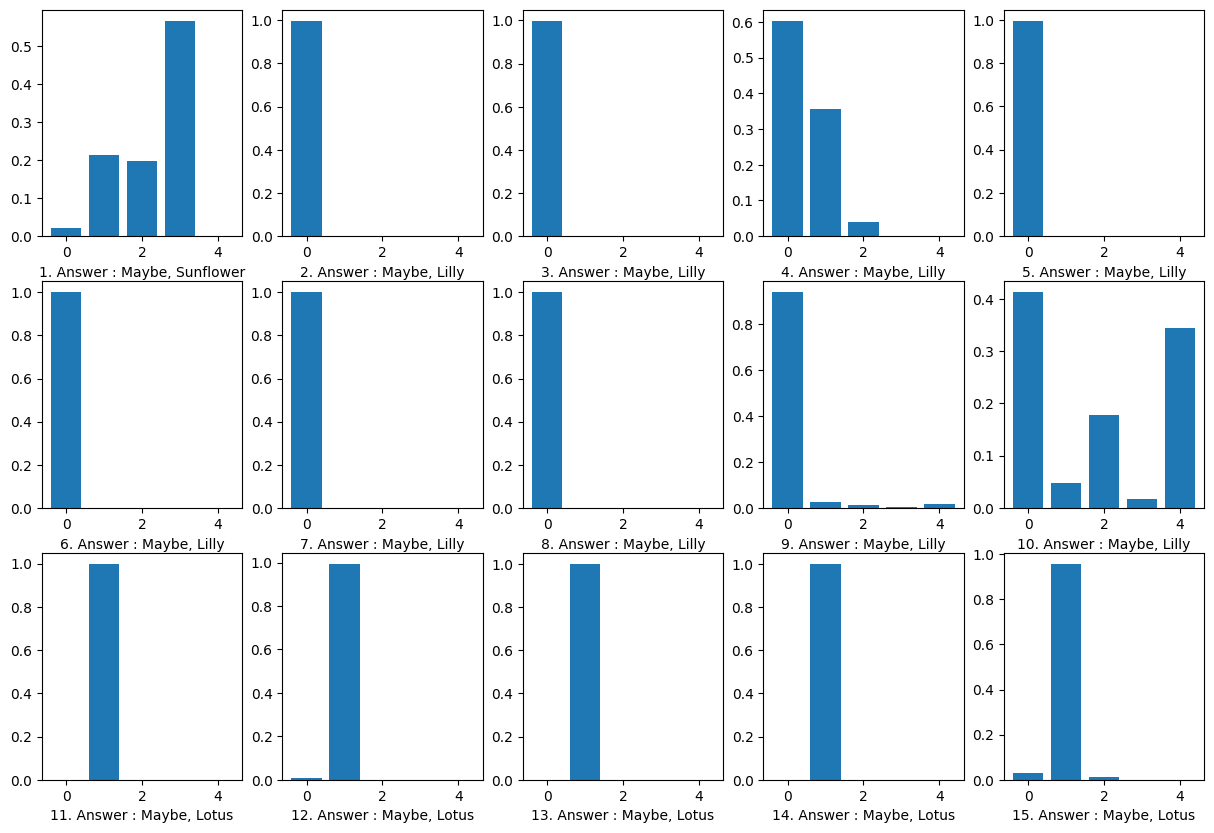

0:Lilly, 1:Lotus, 2:Orchid, 3:Sunflower, 4:Tulip


In [15]:
# test 평가 확인
pred = model.predict(test_scaled[90:105])
print(pred)
print()

plt.figure(figsize=(15,10))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(test_scaled[i+90])
    plt.xlabel(str(i+1) + '. Answer : '+ labels_dict[test_label[i+90]])
    plt.grid(False)
#plt.subplots_adjust(wspace=0.2, hspace=0)  # 서브플롯 간의 간격 설정
plt.show()
print()

plt.figure(figsize=(15,10))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.bar(range(0,5),pred[i])
    plt.xlabel(str(i+1) + '. Answer : Maybe, '+ labels_dict[np.argmax(pred[i])])
    #plt.ylabel('maybe')
plt.show()
print("0:Lilly, 1:Lotus, 2:Orchid, 3:Sunflower, 4:Tulip")
